**Import modules + libraries**

In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Read in the tracks data (pandas dataframe from Save/Track.h5) + convert to datetime to make it easier to use**

In [4]:
#read in the Track.h5 file to a pandas dataframe
mcstracks=pd.read_hdf('Save/Track.h5','table')

#convert ['timestr'] column to datetime in dataframe
mcstracks.timestr=mcstracks.timestr.astype(str)
mcstracks['datetime'] = pd.to_datetime(mcstracks.timestr.str.split(',\s*').str[0])
set(mcstracks['datetime'])

{Timestamp('1998-01-01 00:30:00'),
 Timestamp('1998-01-01 01:30:00'),
 Timestamp('1998-01-01 02:30:00'),
 Timestamp('1998-01-01 03:30:00'),
 Timestamp('1998-01-01 04:30:00'),
 Timestamp('1998-01-01 05:30:00'),
 Timestamp('1998-01-01 06:30:00'),
 Timestamp('1998-01-01 07:30:00'),
 Timestamp('1998-01-01 08:30:00'),
 Timestamp('1998-01-01 09:30:00'),
 Timestamp('1998-01-01 10:30:00'),
 Timestamp('1998-01-01 11:30:00'),
 Timestamp('1998-01-01 12:30:00'),
 Timestamp('1998-01-01 13:30:00'),
 Timestamp('1998-01-01 14:30:00'),
 Timestamp('1998-01-01 15:30:00'),
 Timestamp('1998-01-01 16:30:00'),
 Timestamp('1998-01-01 17:30:00'),
 Timestamp('1998-01-01 18:30:00'),
 Timestamp('1998-01-01 19:30:00'),
 Timestamp('1998-01-01 20:30:00'),
 Timestamp('1998-01-01 21:30:00'),
 Timestamp('1998-01-01 22:30:00'),
 Timestamp('1998-01-01 23:30:00'),
 Timestamp('1998-01-02 00:30:00'),
 Timestamp('1998-01-02 01:30:00'),
 Timestamp('1998-01-02 02:30:00'),
 Timestamp('1998-01-02 03:30:00'),
 Timestamp('1998-01-

In [5]:
mcstracks

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell,datetime
0,0,1,124.018705,527.450051,16954,225,1,1998-01-01 00:30:00,1998-01-01 00:30:00,-35.017294,-63.678216,296.321784,296.321784,1,0 days 00:00:00,1998-01-01 00:30:00
1,0,3,446.183079,796.813680,8633,225,2,1998-01-01 00:30:00,1998-01-01 00:30:00,-21.969636,-52.768989,307.231011,307.231011,2,0 days 00:00:00,1998-01-01 00:30:00
2,0,4,418.714677,670.008714,9589,225,3,1998-01-01 00:30:00,1998-01-01 00:30:00,-23.082106,-57.904585,302.095415,302.095415,-1,0 days 00:00:00,1998-01-01 00:30:00
3,0,12,475.032986,861.417838,2492,225,4,1998-01-01 00:30:00,1998-01-01 00:30:00,-20.801215,-50.152512,309.847488,309.847488,-1,0 days 00:00:00,1998-01-01 00:30:00
4,0,16,534.648900,935.300373,8166,225,5,1998-01-01 00:30:00,1998-01-01 00:30:00,-18.386770,-47.160291,312.839709,312.839709,-1,0 days 00:00:00,1998-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,167,43,616.999846,310.339214,4963,225,1164,1998-01-07 23:30:00,1998-01-07 23:30:00,-15.051556,-72.471218,287.528782,287.528782,-1,6 days 23:00:00,1998-01-07 23:30:00
1164,167,52,630.180338,787.234209,2268,225,1165,1998-01-07 23:30:00,1998-01-07 23:30:00,-14.517747,-53.156958,306.843042,306.843042,-1,6 days 23:00:00,1998-01-07 23:30:00
1165,167,127,870.137009,208.954063,33175,225,1166,1998-01-07 23:30:00,1998-01-07 23:30:00,-4.799501,-76.577300,283.422700,283.422700,-1,6 days 23:00:00,1998-01-07 23:30:00
1166,167,137,872.224650,530.188063,11303,225,1167,1998-01-07 23:30:00,1998-01-07 23:30:00,-4.714951,-63.567335,296.432665,296.432665,-1,6 days 23:00:00,1998-01-07 23:30:00


**Analysis for initiation and dissipation of MCSs**

In [6]:
init_hours = functions.get_mcs_init(mcstracks)
init_hours = np.array(init_hours)
init_hours, bins = np.histogram(init_hours, bins = np.arange(0,25))

diss_hours = functions.get_mcs_diss(mcstracks)
diss_hours = np.array(diss_hours)
diss_hours, bins = np.histogram(diss_hours, bins = np.arange(0,25))

init = init_hours/np.nansum(init_hours) * 100
diss = diss_hours/np.nansum(diss_hours) * 100

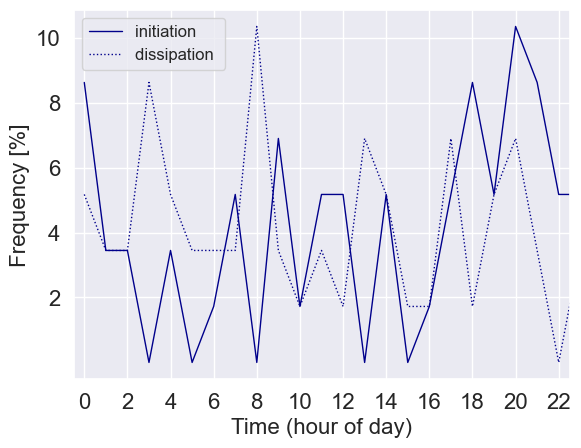

In [7]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.plot(np.arange(0,24), init, label = 'initiation ', color= 'darkblue', linewidth = 1)
plt.plot(np.arange(0,24), diss, label = 'dissipation ', color= 'darkblue', linewidth = 1, linestyle = 'dotted')
plt.xticks(np.arange(0,23)[::2],fontsize=16)
#labels= ti.astype(str)
#plt.xticklabels(labels[::2],fontsize= 16)
plt.yticks(np.arange(2,12,2))
plt.xlabel('Time (hour of day)',fontsize=16)
plt.xlim(-0.5,22.5)
plt.ylabel('Frequency [%]', fontsize = 16 )
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)

In [8]:
init_lats, init_lons, diss_lats, diss_lons = functions.get_init(mcstracks)

Text(0, 0.5, 'Lat $^\\circ$N')

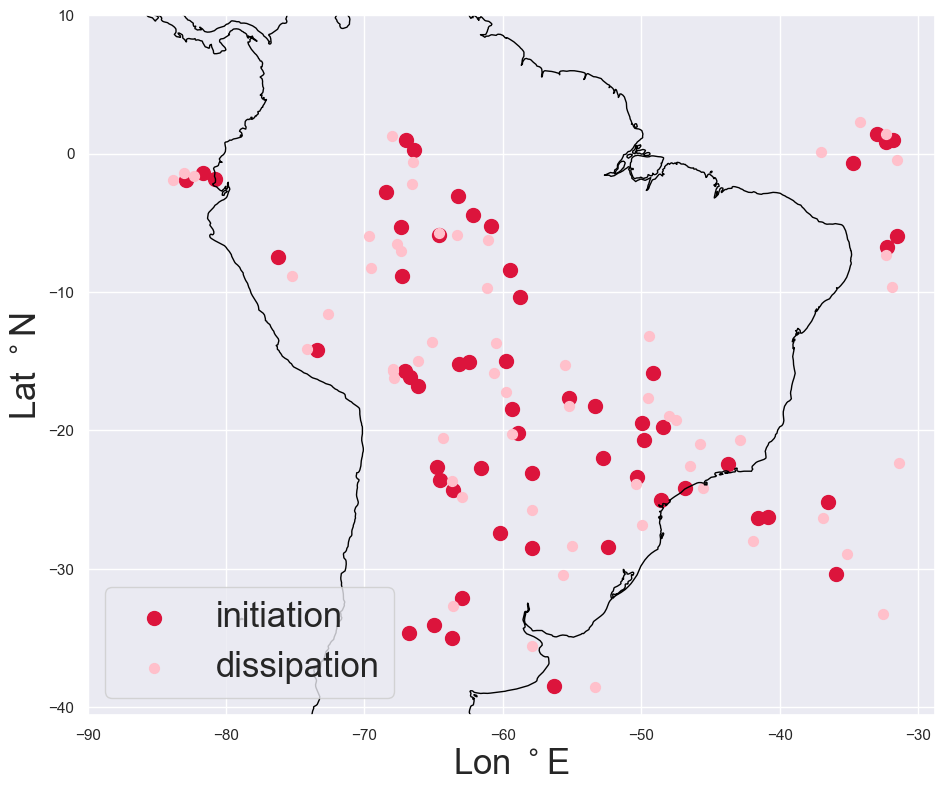

In [9]:
import cartopy.crs as ccrs

plt.figure(figsize=(40,20))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100


# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.scatter(init_lons, init_lats,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons, diss_lats,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')

ax1.coastlines()
ax1.legend(fontsize= 25)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=25)

**MCS area analysis (converts from grid points to area (km2) within function)**

In [10]:
area=functions.get_area(mcstracks)

array of MCS areas generated.


In [12]:
print(area)

[ 75614.55511022 289881.         139806.         325563.92307692
  87690.9375      87338.25       108784.55769231 170472.09375
 100845.         230581.98529412 141349.67307692  83700.
 147192.98684211 120516.42857143 112348.6875      62698.5
 205977.9375     122812.875       71355.47727273 251533.92857143
 115362.         115111.125       90403.59375    113902.67647059
 189608.34375    132830.40789474  73915.03125     64458.28125
  99882.20454545  96190.2         67565.57142857  77036.78571429
  88541.859375    72348.75       417985.9453125  104772.234375
  68098.21875    187155.5625      68942.57142857  80809.07142857
 241678.6875      70562.57142857  66613.5         85270.725
  81493.59375     53977.5        205474.725      127349.35714286
  95522.93181818 294761.025       65986.07142857  76971.80769231
  57093.42857143  99860.85       285815.64705882  58322.53125
  91235.59615385 112174.875     ]


In [20]:
area.mean()

128123.28715131119

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

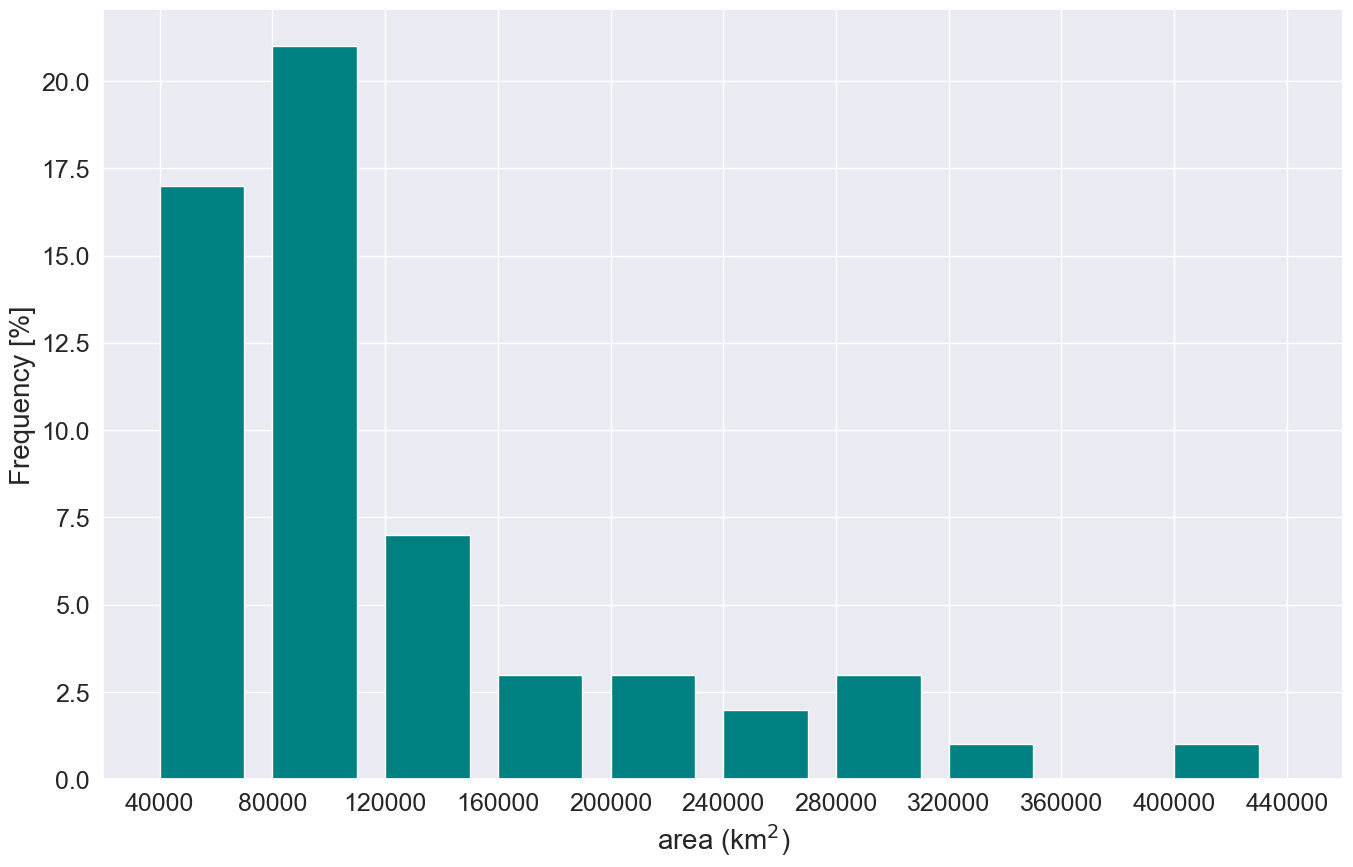

In [13]:
plt.figure(figsize=(16,10))
plt.hist(area,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'teal')
plt.xlabel('area (km$^{2}$)', fontsize= 20)
plt.ylabel('Frequency [%]', fontsize= 20)
plt.xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
plt.yticks(fontsize=18)

**Analysis of MCS velocity/propagation speed**

In [15]:
#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel= tobac.calculate_velocity(mcstracks, method_distance=None)

In [16]:
velocity=functions.get_v(vel)

propagation speed histo calculated.


In [17]:
print(velocity)

(array([ 7,  9,  8,  9,  5, 12,  3,  1,  0,  1,  0,  0]), array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]))


Text(0, 0.5, 'Frequency [%]')

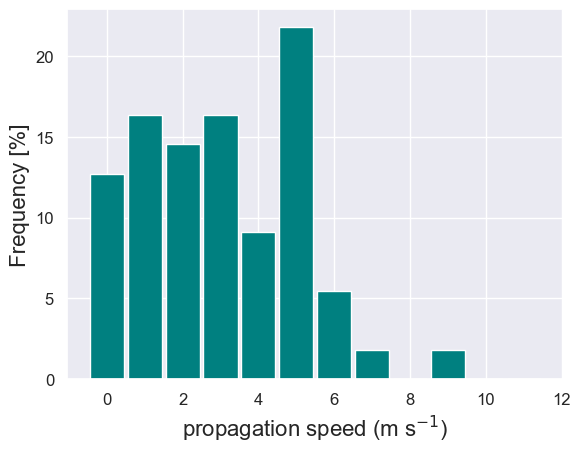

In [18]:
bins=velocity[1]
ticks=np.arange(bins.shape[0]- 1)

plt.bar(ticks, velocity[0]/ np.nansum(velocity[0]) * 100 , width=0.9,color= 'teal')

plt.xticks(fontsize = 12)
plt.yticks(fontsize= 12)

plt.xlabel('propagation speed (m s$^{-1}$)', fontsize= 16)
plt.ylabel('Frequency [%]', fontsize= 16)